# Домашная работа 2

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту *ml-teachers* ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #2: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн: 3.11.2017 6:00 OMSK**

## Numpy

#### Полезная литература

- http://www.numpy.org/
- https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html
- https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

1) Импортировать numpy и написать версию

In [8]:
import numpy as np 
np.__version__

'1.11.3'

2) Создать нулевой вектор размера 10

In [ ]:
np.zeros(1,10)


3) Создать вектор заполненный 7-ами размера 7

In [ ]:
arr = np.array([7,7,7,7,7,7,7])

4) Создать вектор заполненный четными числами от 10 до 100

In [243]:
arr = np.arange(10, 101, 2)
arr

array([ 10,  12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,
        36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,
        62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,
        88,  90,  92,  94,  96,  98, 100])

5) Создать массив случайных чисел и развернуть его задом наперёд

In [244]:
arr = np.random.randint(0,5,10)
print(arr)
print(arr[::-1])

[2 4 3 2 1 3 1 2 2 1]
[1 2 2 1 3 1 2 3 4 2]


6) Создать двумерную матрицу размера 3 на 3, заполненную числами от 0 до 9

In [248]:
arr = np.arange(9)
arr = arr.reshape((3,3))
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

7) Создать матрицу размера 4 на 4 с единицами на диагонали смещеной на один наверх.

In [ ]:
arr = np.zeros((4,4))
arr[0][1]=1.0
arr[1][2]=1.0
arr[2][3]=1.0
arr

8) Создать матрицу с числами в диапазоне от 1 до 4 по диагонали. В других ячейках матрицы должны быть семерки.

In [249]:
arr = np.full((4,4),7,dtype='int32')
v=np.random.randint(1,5,4)
row,col=np.diag_indices(arr.shape[0])
arr[row,col]=v
print(arr)

[[1 7 7 7]
 [7 4 7 7]
 [7 7 2 7]
 [7 7 7 2]]


9) Создать матрицу размера 5 на 5 заполненную чилами от 0 до 4 в строках.

In [ ]:
arr = np.random.randint(0,5,(5,5))
arr


10) Создать матрицу случайных чисел размера 10 на 10 и отнять среднее по строкам из каждого элемента строки

In [ ]:
arr = np.random.random((10, 10))
v = arr.mean(axis=1)
for i in range(10):
    arr[i]=arr[i]-v[i]

12) Создать матрицу случайных чисел размера 10 на 10 и отнять медиану по столбцам из каждого элемента столбца

In [ ]:
arr = np.random.random((10, 10))
v = np.median(arr,axis=0)
for i in range(10):
    arr[:,i]=arr[:,i]-v[i]

13) Создать матрицу случайных чисел 5x5. Добавить к ней столбецы максимумов и минимумов по строкам. Получится матрица 5x7.

In [ ]:
arr = np.random.randint(0,5,(5, 5))
print(arr)
v1=arr.min(axis=1).reshape(5,1)
v2=arr.max(axis=1).reshape(5,1)
np.concatenate((arr,v1,v2),axis=1)

14) Вектор чисел от 1 до 51 преобразовать в вектор нечетных чисел и в вектор четных чисел, поменять их размерности, чтобы получились две матрица. Найти произведение этих матриц. Найти обратную матрицу эётого произведения.

In [ ]:
v=np.arange(1,51,1)
odd=v[v%2==1]
odd=np.array(odd).reshape(5,5)
even=v[v%2==0]
even=even.reshape(5,5)
prod=odd.dot(even)
inv=np.linalg.inv(prod)
print(inv)
print(prod)

15) Создать 8x8 матрицу и заполнить её в шахматном порядке нулями и единицами.

In [ ]:
arr=np.zeros((8,8))
for (i,j),x in np.ndenumerate(arr):
    if (i+j)%2==0:
        arr[i,j]=1
print(arr)


## Pandas

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [10]:
%matplotlib inline
import pandas as pd
pd.__version__

'0.19.2'

In [209]:
df = pd.read_csv('../Data/adult.csv', na_values='?')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета  

In [20]:
n=df.shape[0]
df[n-10:n]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [136]:
lines,col=df.shape
print(lines,col)

32561 15


3) Какие типы данных у элементов этого датасета?

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


4) Какие признаки имеют пропуски?

In [177]:
for col in df.columns:
    print(col,~(df[col].isnull()).all())#есть в этом столбце пропуск?
#ТО есть все столбцы имеют пропуски

age True
workclass True
fnlwgt True
education True
education-num True
marital-status True
occupation True
relationship True
race True
sex True
capital-gain True
capital-loss True
hours-per-week True
native-country True
income True


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Это связано с нежеланием людей указывать информацию, которая может быть использована им во вред. 
Например, сведения о доходах (стране происхождения) могут быть использованы фискальными (миграционными) органами.
В принципе для любого признака можно указать причину его пропуска. Например hours-per-week может быть не заполнен
у работников с почасовойй оплатой. Признак "раса" отсутствует у людей, не относящих себя ни к одной из "станартных" рас

**ответ:**

6) Какие и сколько различных рабочих классов `workclass` представлено в выборке?

In [133]:
df.groupby('occupation').count()['age']

occupation
 ?                    1843
 Adm-clerical         3770
 Armed-Forces            9
 Craft-repair         4099
 Exec-managerial      4066
 Farming-fishing       994
 Handlers-cleaners    1370
 Machine-op-inspct    2002
 Other-service        3295
 Priv-house-serv       149
 Prof-specialty       4140
 Protective-serv       649
 Sales                3650
 Tech-support          928
 Transport-moving     1597
Name: age, dtype: int64

7) Какой средний возраст женщин и мужчин?

In [85]:
print(df[df['sex']==' Female']['age'].mean())
print(df[df['sex']==' Male']['age'].mean())

36.85823043357163
39.43354749885268


8) Постройте гистограмму(bar) распределения образования людей (education)

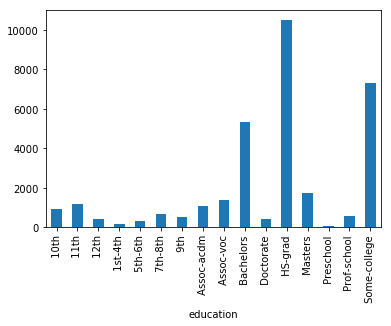

In [134]:
df.groupby('education').count()['age'].plot(kind='bar')

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [131]:
rich=df[df['income']==' >50K']['age']
poor=df[df['income']==' <=50K']['age']
print(rich.mean())
print(poor.mean())
print(rich.std())
print(poor.std())

44.24984058155847
36.78373786407767
10.51902771985177
14.020088490824813


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [142]:
rich=df[df['income']==' >50K']
A=rich.groupby('education').count()['age']
print(A)

education
 10th              62
 11th              60
 12th              33
 1st-4th            6
 5th-6th           16
 7th-8th           40
 9th               27
 Assoc-acdm       265
 Assoc-voc        361
 Bachelors       2221
 Doctorate        306
 HS-grad         1675
 Masters          959
 Prof-school      423
 Some-college    1387
Name: age, dtype: int64


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [242]:
#df[df['marital-status'][0:2]==' M']
richIndices=(df['sex']==' Male')
rich=df[richIndices]
print(rich.shape)
mar_array=rich['marital-status'].values
bool_array=np.zeros(mar_array.shape, dtype=bool)
for i in range(mar_array.shape[0]):
    if(mar_array[i][0:2]==' M'):
        bool_array[i]=True
marr_men=rich[bool_array]
print('married',marr_men.groupby('income').count()['age'])
not_marr_men=rich[~bool_array]
print('unmarried',not_marr_men.groupby('income').count()['age'])    

(21790, 15)
married income
 <=50K    7576
 >50K     5965
Name: age, dtype: int64
unmarried income
 <=50K    7552
 >50K      697
Name: age, dtype: int64


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [150]:
richIndices=df['income']==' >50K'
rich=df[richIndices]
poor=df[-richIndices]
#print(rich['hours-per-week'].mean(),poor['hours-per-week'].mean())
print(rich.groupby('native-country')['hours-per-week'].agg([np.mean]))
print(poor.groupby('native-country')['hours-per-week'].agg([np.mean]))

45.473026399693914 38.840210355987054
                          mean
native-country                
 ?                   45.547945
 Cambodia            40.000000
 Canada              45.641026
 China               38.900000
 Columbia            50.000000
 Cuba                42.440000
 Dominican-Republic  47.000000
 Ecuador             48.750000
 El-Salvador         45.000000
 England             44.533333
 France              50.750000
 Germany             44.977273
 Greece              50.625000
 Guatemala           36.666667
 Haiti               42.750000
 Honduras            60.000000
 Hong                45.000000
 Hungary             50.000000
 India               46.475000
 Iran                47.500000
 Ireland             48.000000
 Italy               45.400000
 Jamaica             41.100000
 Japan               47.958333
 Laos                40.000000
 Mexico              46.575758
 Nicaragua           37.500000
 Peru                40.000000
 Philippines         43.032787
 

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы (capital.gain-capital.loss) создали не больше 10 разных уникальных значений.

In [219]:
d=df.copy()
d['delta']=d['capital-gain']-d['capital-loss']
pd.crosstab(d['education'], d[1:10]['delta'])

delta,0.0,5178.0,14084.0
education,,,
11th,1,0,0
9th,1,0,0
Bachelors,2,1,0
HS-grad,2,0,0
Masters,1,0,1


14) Женщины из каких стран получают в среднем большую зарплату чаще, чем другие зарплату.

In [215]:
women=df[df['sex']==' Female']
women['delta']=women['capital-gain']-women['capital-loss']
#women.head()
women.groupby('native-country')['delta'].agg([np.mean])
#women.groupby('education')['in'].agg([np.mean])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,mean
native-country,
?,1570.104294
Cambodia,968.666667
Canada,2510.871795
China,0.000000
Columbia,-66.750000
Cuba,38.175000
Dominican-Republic,2952.114286
Ecuador,229.111111
El-Salvador,151.800000


15) Создайте случайную колонку - `magic_salary`, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки `magic_salary`

In [256]:
#dd=pd.DataFrame({'x':[1,2,3],'y':[3,2,1]})
#dd['z']=dd['x']-dd['y']
#dd
d=df.copy()
index=d['income']==' >50K'
big_incomes=np.random.randint(51,201,np.count_nonzero(index))
small_incomes=np.random.randint(0,51,index.count()-np.count_nonzero(index))
#print(big_incomes.shape)
#print(small_incomes.shape)
d['magic_salary']=0
d['magic_salary'][index]=big_incomes
d['magic_salary'][~index]=small_incomes
d.groupby('education')['magic_salary'].agg([np.mean])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,mean
education,
10th,31.733119
11th,30.885957
12th,32.944573
1st-4th,28.648810
5th-6th,30.135135
7th-8th,30.645511
9th,29.262646
Assoc-acdm,50.048735
Assoc-voc,51.745297
